## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [29]:
model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [32]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6208 - acc: 0.7621 - val_loss: 0.5439 - val_acc: 0.8403
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4734 - acc: 0.8771 - val_loss: 0.4377 - val_acc: 0.8670
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3738 - acc: 0.8981 - val_loss: 0.3768 - val_acc: 0.8725
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3062 - acc: 0.9139 - val_loss: 0.3282 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2571 - acc: 0.9255 - val_loss: 0.3076 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2200 - acc: 0.9348 - val_loss: 0.2876 - val_acc: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1922 - acc: 0.9437 - val_loss: 0.2826 - val_acc: 0.8886
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1689 - a

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5956 - acc: 0.7249 - val_loss: 0.5011 - val_acc: 0.8459
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4290 - acc: 0.8795 - val_loss: 0.4086 - val_acc: 0.8563
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3383 - acc: 0.9054 - val_loss: 0.3494 - val_acc: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2803 - acc: 0.9193 - val_loss: 0.3131 - val_acc: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2381 - acc: 0.9289 - val_loss: 0.2963 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2080 - acc: 0.9374 - val_loss: 0.2851 - val_acc: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1840 - acc: 0.9456 - val_loss: 0.2758 - val_acc: 0.8921
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1644 - a

## Analizamos resultados

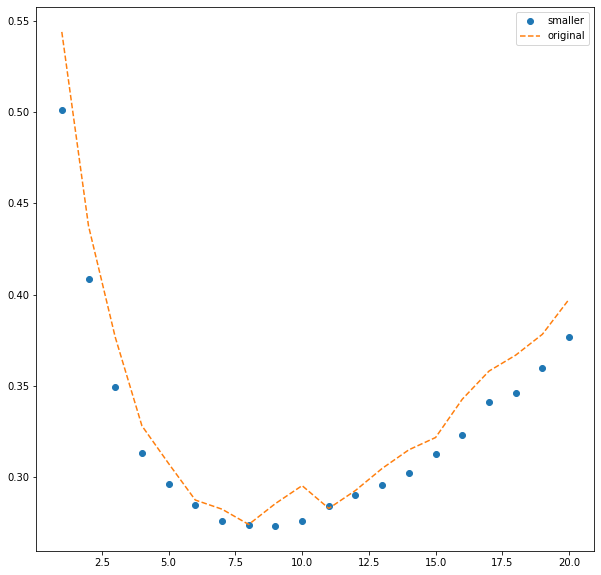

In [33]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

#vemos que el modelo mas sencillo tarda mas en hacer overfitting que el modelo mas complejo
#esto se identifica ya que la linea en lugar de descender se va en ascenso

## Regularización

In [14]:
#aplicamos regularizacion al modelo con el fin de tratar el overfitting
from keras import regularizers

In [15]:
#regularizacion a la primera y segunda capa
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5561 - acc: 0.7844 - val_loss: 0.4335 - val_acc: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3584 - acc: 0.8994 - val_loss: 0.3616 - val_acc: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2863 - acc: 0.9209 - val_loss: 0.3432 - val_acc: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2505 - acc: 0.9344 - val_loss: 0.3288 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2268 - acc: 0.9423 - val_loss: 0.3438 - val_acc: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2097 - acc: 0.9489 - val_loss: 0.3544 - val_acc: 0.8789
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2033 - acc: 0.9514 - val_loss: 0.3499 - val_acc: 0.8814
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1906 - a

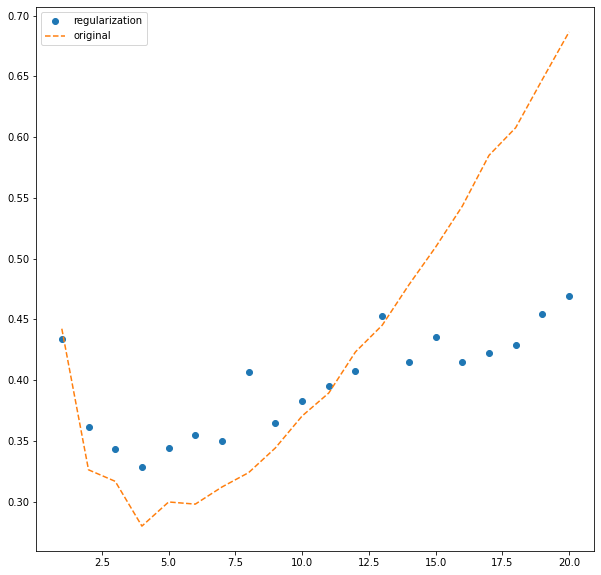

In [18]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()
#el mismo modelo de complejidad alta disminuye su overfittting aplicando regularizacion

### Dropout

In [25]:
#esta vez aplicamos las capa dropout para eliminar aquellas conexiones que no tengan mucha importancia en la red
#como es 0.5 quiere decir que vamos a inhabilitar el 50% de las neuronas en cada iteracion
model4 = models.Sequential()
model4.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(5, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [27]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6635 - acc: 0.5522 - val_loss: 0.6320 - val_acc: 0.8131
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6163 - acc: 0.6035 - val_loss: 0.5612 - val_acc: 0.8558
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5830 - acc: 0.6451 - val_loss: 0.5098 - val_acc: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5552 - acc: 0.6761 - val_loss: 0.4731 - val_acc: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5357 - acc: 0.6991 - val_loss: 0.4460 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5181 - acc: 0.7082 - val_loss: 0.4223 - val_acc: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4968 - acc: 0.7313 - val_loss: 0.3962 - val_acc: 0.8871
Epoch 8/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4816 - a

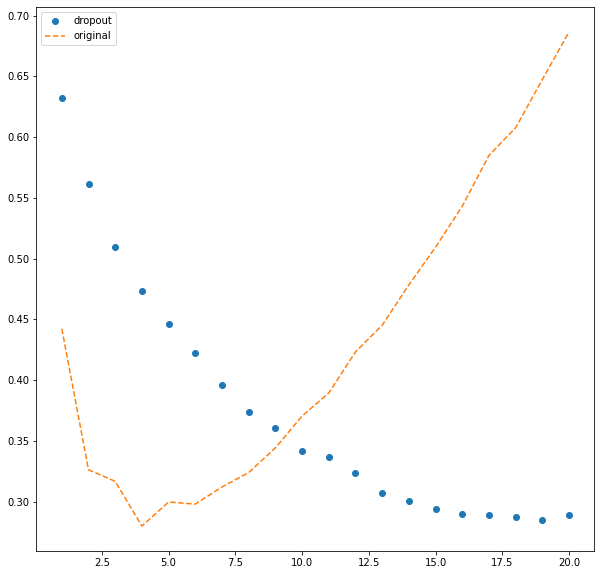

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()